# Using the fitting module to fit distributions (e.g. bunch line density)

In [1]:
# Adding folder on TOP of blond_common to PYTHONPATH
import sys
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
sys.path.append('./../../../')

## 0. Defining a distribution to fit

The line densities are defined as follow:

Gaussian:
$\lambda = \lambda_0 e^{-\frac{\left(t-t_0\right)^2}{2\sigma^2}}$

Binomial:
$\lambda = \lambda_0 \left[1-4\left(\frac{t-t_0}{\tau_l}\right)^2\right]^\mu$
with $\sigma=\frac{\tau_l}{2\sqrt{3+2\mu}}$ ("Parabolic amplitude" is $\mu=3/2$)

In [2]:
# Here we generate some distributions to test the fitting routines
# NB: the parameters for all functions are organized as [amplitude, position, length, exponent]

from blond_common.interfaces.beam.analytic_distribution import gaussian, parabolicAmplitude, binomialAmplitudeN
from blond_common.interfaces.beam.analytic_distribution import _binomialRMS

time_array = np.arange(0, 25e-9, 0.1e-9)

amplitude = 1.
position = 13e-9
length = 2e-9
initial_params_gauss = [amplitude, position, length]
gaussian_dist = gaussian(time_array, *initial_params_gauss)
sigma_gauss = length

amplitude = 1.3
position = 4e-9
length = 5e-9
initial_params_parabamp = [amplitude, position, length]
parabamp_dist = parabolicAmplitude(time_array, *initial_params_parabamp)
sigma_parabamp = _binomialRMS(length, 1.5)

amplitude = 0.77
position = 18.3e-9
length = 3.45e-9
exponent = 3.4
initial_params_binom = [amplitude, position, length, exponent]
binom_dist = binomialAmplitudeN(time_array, *initial_params_binom)
sigma_binom = _binomialRMS(length, exponent)


In [3]:
plt.figure('Distributions')
plt.clf()
plt.plot(time_array*1e9, gaussian_dist, label='Gaussian')
plt.plot(time_array*1e9, parabamp_dist, label='Parabolic amplitude ($\\mu=1.5$)')
plt.plot(time_array*1e9, binom_dist, label='Binomial with $\\mu=3.4$')
plt.xlabel('Time [ns]')
plt.legend(loc='best')

<IPython.core.display.Javascript object>

## 1. RMS related functions

In [4]:
# The RMS parameters can be obtained directly from the line density using the RMS function

from blond_common.fitting.profile import RMS

rms_gauss = RMS(time_array, gaussian_dist)
rms_parabamp = RMS(time_array, parabamp_dist)
rms_binom = RMS(time_array, binom_dist)

print('Gauss: Input ->',[initial_params_gauss[1], sigma_gauss], '/ Output ->', rms_gauss[0:2])
print('Parab. amp.: Input ->',[initial_params_parabamp[1], sigma_parabamp], '/ Output ->', rms_parabamp[0:2])
print('Binomial: Input ->',[initial_params_binom[1], sigma_binom], '/ Output ->', rms_binom[0:2])


Gauss: Input -> [1.3e-08, 2e-09] / Output -> (1.2999999986651516e-08, 1.99999989220699e-09)
Parab. amp.: Input -> [4e-09, 1.0206207261596578e-09] / Output -> (4.000000000000001e-09, 1.0205166802181952e-09)
Binomial: Input -> [1.83e-08, 5.510310373124482e-10] / Output -> (1.83e-08, 5.510315808690647e-10)


## 2. Full-Width Half Maximum related functions

In [5]:
# The FWHM can be obtained, note that the level can be manually set

from blond_common.fitting.profile import FWHM, PlotOptions

plotOpt=PlotOptions(figname='FWHM', clf=False)

fwhm_gauss = FWHM(time_array, gaussian_dist, plotOpt=plotOpt)
fwXm_parabamp = FWHM(time_array, parabamp_dist, level=0.8, plotOpt=plotOpt)
fwXm_binom = FWHM(time_array, binom_dist, level=0.2, plotOpt=plotOpt)


<IPython.core.display.Javascript object>

In [6]:
# The FWHM can be obtained, note that the level can be manually set
# The bunchLengthFactor option can be used to rescale the FWHM to another value
# e.g. : to 4sigma assuming Gaussian, or parabolic_line, or parabolic_amplitude

from blond_common.fitting.profile import FWHM, FitOptions

fitOpt = FitOptions(bunchLengthFactor='gaussian')
fwhm_gauss = FWHM(time_array, gaussian_dist, fitOpt=fitOpt)

fitOpt = FitOptions(bunchLengthFactor='parabolic_amplitude')
fwhm_parabamp = FWHM(time_array, parabamp_dist, level=0.2, fitOpt=fitOpt)

print('Gauss: Input ->',[initial_params_gauss[1], sigma_gauss*4], '/ Output ->', fwhm_gauss[0:2])
print('Parab. amp.: Input ->',[initial_params_parabamp[1], sigma_parabamp*4], '/ Output ->', fwhm_parabamp[0:2])


Gauss: Input -> [1.3e-08, 8e-09] / Output -> (1.3e-08, 8.000683951586705e-09)
Parab. amp.: Input -> [4e-09, 4.082482904638631e-09] / Output -> (4e-09, 4.083490874614144e-09)


In [7]:
# The width at 2 different levels can give all needed information on the binomial parameters
# The binomialParametersFromRatio function can be used directly

from blond_common.fitting.profile import binomialParametersFromRatio, PlotOptions

plotOpt=PlotOptions(figname='BinomRatio', clf=False)

binom_params_parabamp = binomialParametersFromRatio(time_array, parabamp_dist, plotOpt=plotOpt)
binom_params_binom = binomialParametersFromRatio(time_array, binom_dist, plotOpt=plotOpt)

print('Parab. amp.: Initial ->',initial_params_parabamp, '/ Final ->', binom_params_parabamp[-1])
print('Binomial: Initial ->',initial_params_binom, '/ Final ->', binom_params_binom[-1])


<IPython.core.display.Javascript object>

Parab. amp.: Initial -> [1.3, 4e-09, 5e-09] / Final -> [5.01097830e-09 1.51037419e+00]
Binomial: Initial -> [0.77, 1.83e-08, 3.45e-09, 3.4] / Final -> [3.54646361e-09 3.62795039e+00]


In [8]:
# The rms bunch lengths as input and using binomialParametersFromRatio can be compared

from blond_common.fitting.profile import binomialParametersFromRatio
from blond_common.interfaces.beam.analytic_distribution import _binomialRMS

binom_params_parabamp = binomialParametersFromRatio(time_array, parabamp_dist)
binom_params_binom = binomialParametersFromRatio(time_array, binom_dist)

print('Parab. amp.: Initial ->',sigma_parabamp, '/ Final ->', _binomialRMS(*binom_params_parabamp[-1]))
print('Binomial: Initial ->',sigma_binom, '/ Final ->', _binomialRMS(*binom_params_binom[-1]))


Parab. amp.: Initial -> 1.0206207261596578e-09 / Final -> 1.0210976763456152e-09
Binomial: Initial -> 5.510310373124482e-10 / Final -> 5.537052068779546e-10


In [9]:
# For the Gaussian case, the exponent goes to infinity so a fair
# approximation consists of extending the look-up table for the binomial parameters

from blond_common.fitting.profile import PlotOptions
from blond_common.fitting.profile import binomialParametersFromRatio, _binomialParametersFromRatioLookupTable

plotOpt=PlotOptions(figname='BinomRatio-2', clf=False)

binom_params_gauss = binomialParametersFromRatio(time_array, gaussian_dist, plotOpt=plotOpt)

print('Gauss: Initial ->',initial_params_gauss, '/ Final ->', binom_params_gauss[-1])


<IPython.core.display.Javascript object>

Gauss: Initial -> [1.0, 1.3e-08, 2e-09] / Final -> [1.82983432e-08 1.00000000e+01]


In [10]:
# For the Gaussian case, the exponent goes to infinity so a fair
# approximation consists of extending the look-up table for the binomial parameters

from blond_common.fitting.profile import PlotOptions
from blond_common.fitting.profile import binomialParametersFromRatio, _binomialParametersFromRatioLookupTable

plotOpt=PlotOptions(figname='BinomRatio-3', clf=False)

newLookupTable = _binomialParametersFromRatioLookupTable(
    exponentMin=100, exponentMax=10000)

binom_params_gauss = binomialParametersFromRatio(
    time_array, gaussian_dist, plotOpt=plotOpt,
    ratioLookUpTable=newLookupTable)

print('Gauss: Initial ->',initial_params_gauss, '/ Final ->', binom_params_gauss[-1])


<IPython.core.display.Javascript object>

Gauss: Initial -> [1.0, 1.3e-08, 2e-09] / Final -> [5.65623932e-07 1.00000000e+04]


## 3. Distribution fitting routines

In [12]:
from blond_common.fitting.profile import gaussianFit, parabolicAmplitudeFit, binomialAmplitudeNFit, PlotOptions

fitparams_gauss = gaussianFit(time_array, gaussian_dist)

fitparams_parabamp = parabolicAmplitudeFit(time_array, parabamp_dist)

fitparams_binom = binomialAmplitudeNFit(time_array, binom_dist)

print('Gauss: Initial ->',initial_params_gauss, '/ Final ->', fitparams_gauss)
print('Parab. amp.: Initial ->',initial_params_parabamp, '/ Final ->', fitparams_parabamp)
print('Binomial: Initial ->',initial_params_binom, '/ Final ->', fitparams_binom)


Gauss: Initial -> [1.0, 1.3e-08, 2e-09] / Final -> [9.99999999e-01 1.30000000e-08 2.00000000e-09]
Parab. amp.: Initial -> [1.3, 4e-09, 5e-09] / Final -> [1.3e+00 4.0e-09 5.0e-09]
Binomial: Initial -> [0.77, 1.83e-08, 3.45e-09, 3.4] / Final -> [7.70e-01 1.83e-08 3.45e-09 3.40e+00]


<IPython.core.display.Javascript object>


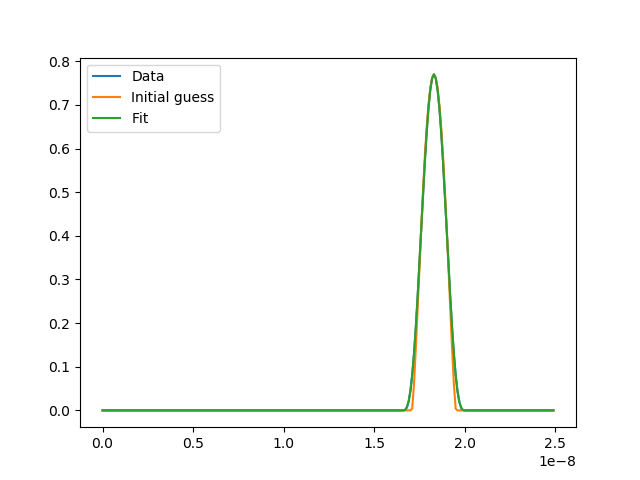

In [13]:
plotOpt=PlotOptions(figname='Fit-1', clf=False)

fitparams_binom = binomialAmplitudeNFit(time_array, binom_dist, plotOpt=plotOpt)

<IPython.core.display.Javascript object>


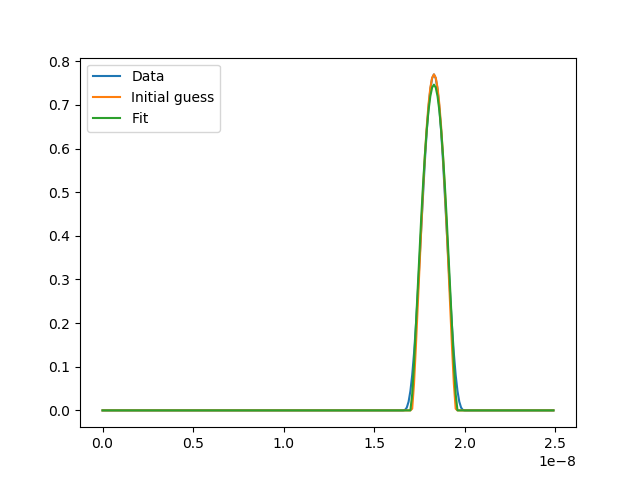

array([7.46521800e-01, 1.83000000e-08, 2.58267951e-09])

In [14]:
# Using a fit function that does not necessarily correspond to the input
# (e.g. parabolicAmplitudeFit on a binomial distribution with more tails)

from blond_common.fitting.profile import gaussianFit, parabolicAmplitudeFit, binomialAmplitudeNFit, PlotOptions

plotOpt=PlotOptions(figname='Fit-2', clf=False)

parabolicAmplitudeFit(time_array, binom_dist, plotOpt=plotOpt)


In [15]:
# Using custom FitOptions
# NB: a new FitOptions should be created to reset initial conditions,
# but the same FitOptions can be used to share the same initial conditions

from blond_common.fitting.profile import gaussianFit, parabolicAmplitudeFit, binomialAmplitudeNFit, FitOptions

fitOpt = FitOptions(fittingRoutine='minimize')
fitparams_gauss = gaussianFit(time_array, gaussian_dist, fitOpt=fitOpt)

fitOpt = FitOptions(fittingRoutine='minimize')
fitparams_parabamp = parabolicAmplitudeFit(time_array, parabamp_dist, fitOpt=fitOpt)

fitOpt = FitOptions(fittingRoutine='minimize')
fitparams_binom = binomialAmplitudeNFit(time_array, binom_dist, fitOpt=fitOpt)

print('Gauss: Initial ->',initial_params_gauss, '/ Final ->', fitparams_gauss)
print('Parab. amp.: Initial ->',initial_params_parabamp, '/ Final ->', fitparams_parabamp)
print('Binomial: Initial ->',initial_params_binom, '/ Final ->', fitparams_binom)


Gauss: Initial -> [1.0, 1.3e-08, 2e-09] / Final -> [9.99999999e-01 1.30000000e-08 2.00000000e-09]
Parab. amp.: Initial -> [1.3, 4e-09, 5e-09] / Final -> [1.3e+00 4.0e-09 5.0e-09]
Binomial: Initial -> [0.77, 1.83e-08, 3.45e-09, 3.4] / Final -> [7.70e-01 1.83e-08 3.45e-09 3.40e+00]


In [16]:
# Using custom FitOptions
# NB: a new FitOptions should be created to reset initial conditions,
# but the same FitOptions can be used to share the same initial conditions

from blond_common.fitting.profile import gaussianFit, parabolicAmplitudeFit, binomialAmplitudeNFit, FitOptions

fitOpt = FitOptions(fittingRoutine='minimize',
                    method=None, # method='Nelder-Mead' or method='Powell' or method=None
                    options={'disp':True})

fitparams_binom = binomialAmplitudeNFit(time_array, binom_dist, fitOpt=fitOpt)

print('Binomial: Initial ->',initial_params_binom, '/ Final ->', fitparams_binom)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 156
         Gradient evaluations: 26
Binomial: Initial -> [0.77, 1.83e-08, 3.45e-09, 3.4] / Final -> [7.69999949e-01 1.82999998e-08 3.44998665e-09 3.39996875e+00]
